#### 모듈 Import 데이터 불러오기

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU

raw_df = pd.read_csv('./005930.KS.csv')
raw_df.shape

(6172, 7)

In [4]:
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.950684,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.683838,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.685059,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.685059,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.440430,46880000


#### yahoo finance 에서 데이터 다운로드 후 3일(3MA), 5일(5MA) 가격이동평균선 추가

In [5]:
raw_df['3MA'] = raw_df['Adj Close'].rolling(window=3).mean()
raw_df['5MA'] = raw_df['Adj Close'].rolling(window=5).mean()
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.950684,74195000,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.683838,74680000,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.685059,54390000,4183.439860,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.685059,40305000,4045.684652,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.440430,46880000,4091.603516,4150.089014


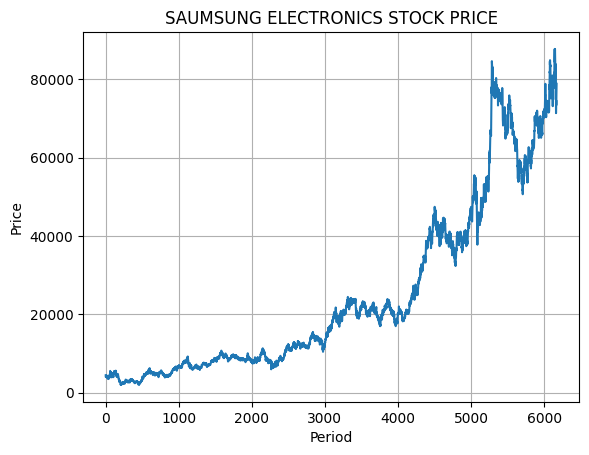

In [6]:
plt.title('SAUMSUNG ELECTRONICS STOCK PRICE')
plt.ylabel('Price')
plt.xlabel('Period')
plt.grid()

plt.plot(raw_df['Adj Close'], label='Adj Close')
plt.show()

#### 데이터 전처리 (Missing Data 처리, 정규화 등)

In [7]:
# 통계정보 확인

raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6.172000e+03,6170.000000,6168.000000
mean,28757.817563,29035.654569,28467.208360,28746.882696,24810.522704,2.117354e+07,24805.171950,24800.123467
std,22959.695704,23139.691270,22758.678867,22936.538437,22396.824150,1.502833e+07,22385.657588,22375.710644
min,2540.000000,2760.000000,2420.000000,2730.000000,1979.339600,0.000000e+00,2022.841919,2037.342529
25%,10775.000000,10940.000000,10635.000000,10780.000000,7900.805419,1.171541e+07,7916.969930,7910.297559
50%,21640.000000,21790.000000,21320.000000,21600.000000,16719.937500,1.716862e+07,16779.096029,16701.423047
75%,46042.500000,46410.000000,45570.000000,46005.000000,39203.531250,2.614861e+07,39185.833333,39223.596094
max,90300.000000,96800.000000,89500.000000,91000.000000,87800.000000,1.642150e+08,87733.333333,87540.000000


In [8]:
# Missing Data 확인

raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
dtype: int64

In [9]:
# 최소값이 0 인 column 체크

for col in raw_df.columns:
    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

Volume <class 'str'>


In [10]:
raw_df.loc[raw_df['Volume']==0]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3719.420166,0,3748.421631,3829.625000
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3712.169434,0,3634.832520,3658.516846
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,4930.226074,0,5002.729004,4995.478418
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5009.978027,0,5055.896972,5136.133984
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4350.199707,0,4205.192220,4152.989502
...,...,...,...,...,...,...,...,...,...
5564,2022-02-28,71900.0,71900.0,71900.0,71900.0,68119.820313,0,67993.497396,68953.560938
5567,2022-03-04,72900.0,72900.0,72900.0,72900.0,69067.257813,0,68688.283855,68460.898438
5570,2022-03-10,69500.0,69500.0,69500.0,69500.0,65846.007813,0,66035.494792,67248.200000
5573,2022-03-15,70200.0,70200.0,70200.0,70200.0,66509.203125,0,66446.041667,66206.028125


In [13]:
# 각 column에 0 몇개인지 확인

for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col] == 0].shape[0]
    print('{} : {}'.format(col, missing_rows))

Date : 0
Open : 0
High : 0
Low : 0
Close : 0
Adj Close : 0
Volume : 127
3MA : 0
5MA : 0


In [14]:
# 먼저 0 을 NaN 으로 바꾼후, Missing Data 처리
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)


# 각 column에 0 몇개인지 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col] == 0].shape[0]
    print('{} : {}'.format(col, missing_rows))


Date : 0
Open : 0
High : 0
Low : 0
Close : 0
Adj Close : 0
Volume : 0
3MA : 0
5MA : 0


In [15]:
# missing data 확인

raw_df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
3MA            2
5MA            4
dtype: int64

In [16]:
raw_df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume        True
3MA           True
5MA           True
dtype: bool

In [17]:
raw_df.loc[raw_df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA


In [21]:
# missing data 처리

raw_df = raw_df.dropna()
raw_df.shape
# raw_df.isnull().sum()

(6041, 9)

In [22]:
# 정규화 (Date 제외한 모든 수치부분 정규화)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_columns = raw_df.columns[1:]

scaled_df = scaler.fit_transform(raw_df[scale_columns])

scaled_df = pd.DataFrame(scaled_df, columns=scale_columns)

scaled_df

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,0.034868,0.032008,0.036288,0.034440,0.025683,0.285359,0.024137,0.024544
1,0.037375,0.035517,0.038470,0.034440,0.025683,0.363715,0.024560,0.023968
2,0.034982,0.031689,0.036518,0.033873,0.025260,0.177799,0.025067,0.024205
3,0.034868,0.031689,0.036059,0.033760,0.025176,0.250704,0.024898,0.024358
4,0.036235,0.033177,0.037437,0.035120,0.026190,0.300555,0.025067,0.024850
...,...,...,...,...,...,...,...,...
6036,0.833637,0.776691,0.824299,0.815339,0.847356,0.099646,0.842882,0.833895
6037,0.827940,0.777754,0.831190,0.824402,0.856678,0.059759,0.845993,0.843487
6038,0.842753,0.785198,0.839228,0.831200,0.863669,0.065100,0.856494,0.851909
6039,0.853008,0.797958,0.856454,0.843661,0.876487,0.080509,0.866216,0.857758


#### 주가예측을 위해 3MA, 5MA, Adj Close 항목을 feature 선정

* 정답은 Adj Close 선정
* 시계열 데이터를 위한 window_size = 40 선정

In [23]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):
        feature_list.append(feature[i : i + window_size])
        label_list.append(label[i + window_size])

    return np.array(feature_list), np.array(label_list)

In [118]:
# feature_df, label_df 생성

feature_col = ['3MA', '5MA', 'Adj Close']
label_col = ['Adj Close']

feature_df = pd.DataFrame(scaled_df, columns=feature_col)
label_df = pd.DataFrame(scaled_df, columns=label_col)

In [119]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(6041, 3) (6041, 1)


#### 시계열 데이터 생성 (make_sequence_dataset)

In [120]:
window_size = 40

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(6001, 40, 3) (6001, 1)


In [121]:
# train, test 분리

#split = int(len(X)*0.95)
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5801, 40, 3) (5801, 1)
(200, 40, 3) (200, 1)


#### 모델 구축 및 컴파일

In [214]:
# model 생성

model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=x_train[0].shape))
# model.add(LSTM(32, activation='tanh',))
model.add(LSTM(64, activation='tanh',))
# model.add(GRU(64, activation='tanh',))
model.add(Dense(1, activation='linear'))

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [215]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                  │ (None, 40, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,497 (197.25 KB)

 Trainable params: 50,497 (197.25 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 학습 (EarlyStopping 적용)

In [216]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train,
          epochs=100,
          batch_size=16,
          callbacks=early_stopping,
          validation_data=(x_test, y_test))


Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0041 - mae: 0.0279 - val_loss: 0.0017 - val_mae: 0.0320
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2.2032e-04 - mae: 0.0094 - val_loss: 0.0028 - val_mae: 0.0452
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2.4476e-04 - mae: 0.0096 - val_loss: 0.0010 - val_mae: 0.0242
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1.8193e-04 - mae: 0.0087 - val_loss: 0.0012 - val_mae: 0.0274
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1.4368e-04 - mae: 0.0077 - val_loss: 7.5996e-04 - val_mae: 0.0211
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1.3556e-04 - mae: 0.0075 - val_loss: 5.6829e-04 - val_mae: 0.0177
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.1435e-04 - mae: 0.0070 - val_loss: 5.9438e-04 - val_mae: 0.0185
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.1719e-04 - mae: 0.0070 - val_loss: 4.9812e-04 - val_mae: 0.0

#### 예측을 통한 정답과의 비교 (오차계산 MAPE 사용, 평균절대값백분율오차)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


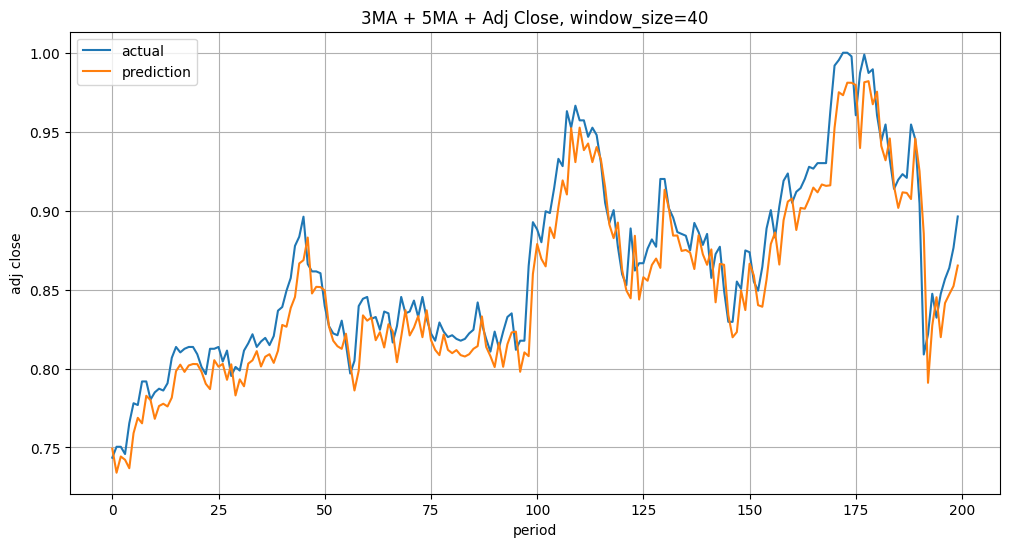

In [217]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [218]:
# 평균절대값백분율오차계산 (MAPE)

print(np.sum(abs(y_test - pred) / y_test) / len(x_test) * 100)

1.8066615882555266
